In [2]:
import torch 
from tqdm import tqdm
import torchvision
import torch.nn as nn
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from torchvision.datasets import MNIST
import torch.utils.data as Data
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

#Deep autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
          nn.Linear(input_size * input_size * 3, 512),
          nn.ReLU(True),
          nn.Linear(512, 256),
          nn.ReLU(True),
          nn.Linear(256, encoding_dim),
          nn.ReLU(True),)
        self.decoder = nn.Sequential(
          nn.Linear(encoding_dim, 256),
          nn.ReLU(True),
          nn.Linear(256, 512),
          nn.ReLU(True),
          nn.Linear(512, input_size * input_size * 3),
          nn.Sigmoid(),)
        

    def forward(self, x):
        return self.decoder(self.encoder(x))
    
BATCH_SIZE = 128
EPOCH = 26 
LR = 0.001
N_TEST_IMG = 5
input_size = 32
encoding_dim = 128
model = Autoencoder(input_size, encoding_dim)
print(model)



Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU(inplace)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=512, out_features=3072, bias=True)
    (5): Sigmoid()
  )
)


**Import Data**

In [3]:

x_train = CIFAR10(
    root = './cifar10/',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True,
)

print("The input dimensions are: ", x_train.train_data.shape)     
print(len(x_train.train_labels))

Files already downloaded and verified
The input dimensions are:  (50000, 32, 32, 3)
50000


torch.Size([3, 32, 32])
tensor([0.2314, 0.1686, 0.1961,  ..., 0.5490, 0.3294, 0.2824])
tensor([0.2314, 0.2431, 0.2471,  ..., 0.4824, 0.3608, 0.2824])


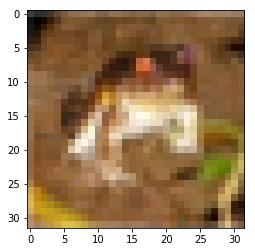

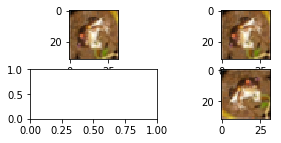

In [4]:
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=False)
plt.imshow(x_train.train_data[0])
for step, (x,y) in enumerate(train_loader):
    f, b = plt.subplots(2, 2, figsize=(5, 2))
    print(x[0].size())
    b[0][0].imshow(np.swapaxes(x[0].numpy(),0,2))
    a = Variable(x.view(-1, input_size*input_size*3))
    print(a[0])
    b[0][1].imshow(np.swapaxes(np.reshape(a.data.numpy()[0], (3,input_size, input_size)),0,2))
    break
view_data = Variable(torch.from_numpy(np.reshape(x_train.train_data[0],(-1, input_size*input_size*3))).type(torch.FloatTensor))
print(view_data[0]/255.0)
plt.imshow(np.reshape(view_data.data.numpy()[0]/255.0, (input_size, input_size, 3)))

  0%|          | 0/390 [00:00<?, ?it/s]/Users/haosheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch:  0 | train loss: 0.0618


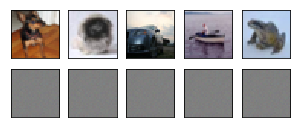

391it [00:25, 15.56it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  1 | train loss: 0.0262


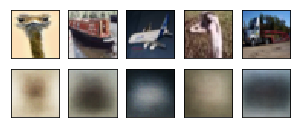

391it [00:42,  9.29it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  2 | train loss: 0.0225


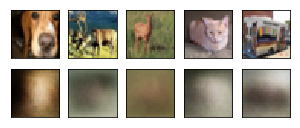

391it [00:51,  7.61it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  3 | train loss: 0.0234


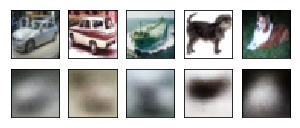

391it [00:56,  6.95it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  4 | train loss: 0.0181


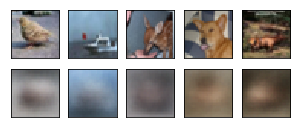

391it [00:54,  7.19it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  5 | train loss: 0.0185


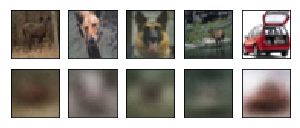

391it [00:54,  7.13it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  6 | train loss: 0.0168


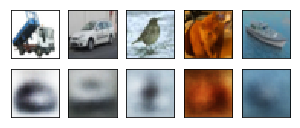

391it [20:49,  3.20s/it]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  7 | train loss: 0.0149


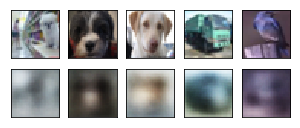

391it [01:11,  5.47it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  8 | train loss: 0.0162


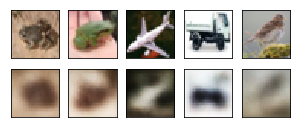

391it [00:57,  6.83it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  9 | train loss: 0.0139


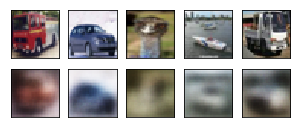

391it [00:56,  6.89it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  10 | train loss: 0.0137


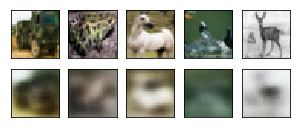

391it [00:56,  6.94it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  11 | train loss: 0.0145


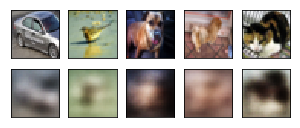

391it [00:56,  6.95it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  12 | train loss: 0.0138


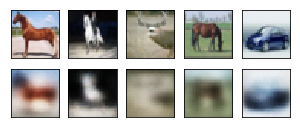

391it [00:57,  6.84it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  13 | train loss: 0.0127


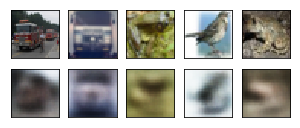

391it [14:08,  2.17s/it]                          
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  14 | train loss: 0.0123


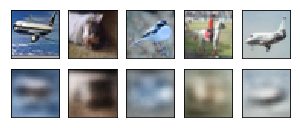

391it [8:13:35, 75.74s/it]                           
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  15 | train loss: 0.0124


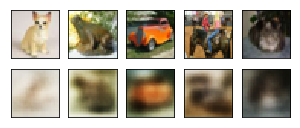

391it [2:31:26, 23.24s/it]                            
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  16 | train loss: 0.0113


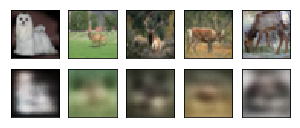

391it [01:08,  5.67it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  17 | train loss: 0.0110


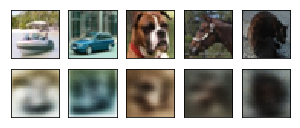

391it [00:58,  6.65it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  18 | train loss: 0.0123


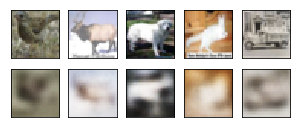

391it [00:59,  6.61it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  19 | train loss: 0.0114


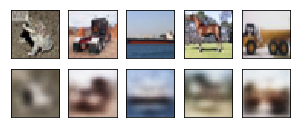

391it [00:59,  6.55it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  20 | train loss: 0.0109


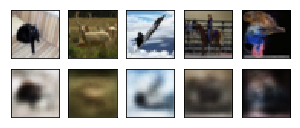

391it [00:57,  6.81it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  21 | train loss: 0.0119


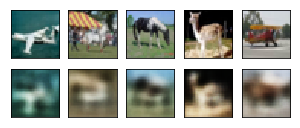

391it [00:57,  6.75it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  22 | train loss: 0.0110


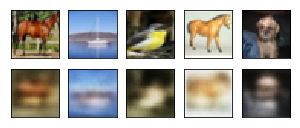

391it [00:57,  6.82it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  23 | train loss: 0.0114


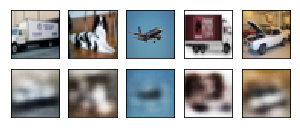

391it [00:57,  6.76it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  24 | train loss: 0.0100


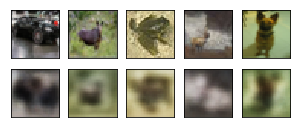

391it [00:58,  6.74it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  25 | train loss: 0.0101


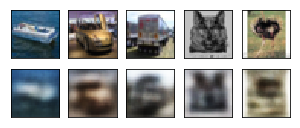

391it [00:57,  6.76it/s]                         


In [7]:
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)
autoencoder = Autoencoder(input_size, encoding_dim)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

for epoch in range(EPOCH):
    for step, (x,y) in tqdm(enumerate(train_loader), total = int(50000/BATCH_SIZE)):
        b_x = Variable(x.view(-1, input_size*input_size*3))   
        b_y = Variable(x.view(-1, input_size*input_size*3))   
        decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               
        loss.backward()                     
        optimizer.step()                    
        if step % 500 == 0 and epoch in range(EPOCH):
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])

            decoded_data = decoded
            
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.swapaxes(np.swapaxes(np.reshape(b_x.data.numpy()[i], (3, input_size, input_size)), 0 ,2), 0, 1))
                a[0][i].set_xticks(())
                a[0][i].set_yticks(())
            
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.swapaxes(np.swapaxes(np.reshape(decoded_data.data.numpy()[i], (3, input_size, input_size)), 0 ,2),0,1))
                #a[1][i].imshow(np.swapaxes(np.swapaxes(np.reshape(decoded_data.data.numpy()[i], (3, input_size, input_size)),0,2),0,1))
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show()      




**Convolutional Autoencoder**

In [115]:
class ConvolutionalAutoEncoder(nn.Module):
    def __init__(self, input_size):
        super(ConvolutionalAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=1, padding= 0),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(16, 8, 3, stride=1, padding= 0),
            nn.MaxPool2d(2, stride=1),
            nn.ReLU(True),
            nn.Conv2d(8, 8, 4, stride=1, padding= 0),
            nn.MaxPool2d(2, stride=1),
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(8, 8, 3, stride=1, padding= 0),
            nn.ReLU(True),
            nn.UpsamplingNearest2d(scale_factor=2),
            nn.Conv2d(8, 8, 4, stride=1, padding= 0),
            nn.ReLU(True),
            nn.UpsamplingNearest2d(scale_factor=2),
            nn.Conv2d(8, 3, 3, stride=1, padding= 0),
            nn.UpsamplingNearest2d(scale_factor=2),
            nn.Tanh(),
            
#             nn.Conv2d(8, 8, 3, stride=1, padding= 0),
#             nn.ReLU(True),
#             nn.UpsamplingNearest2d(scale_factor=2),
#             nn.Conv2d(8, 8, 4, stride=1, padding= 0),
#             nn.ReLU(True),
#             nn.UpsamplingNearest2d(scale_factor=2),
#             nn.Conv2d(8, 16, 5, stride=1, padding= 0),
#             nn.ReLU(True),
#             nn.UpsamplingNearest2d(scale_factor=2),
#             nn.Conv2d(16, 3, 5, stride=1, padding= 0),
#             nn.Sigmoid(),
            
#             nn.ConvTranspose2d(8, 16, 2, stride=3, padding=0),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(8, 3, 4, stride=2, padding=0),
#             nn.Sigmoid(),
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = ConvolutionalAutoEncoder(input_size)

print(model)

ConvolutionalAutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace)
    (6): Conv2d(8, 8, kernel_size=(4, 4), stride=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace)
    (2): UpsamplingNearest2d(scale_factor=2, mode=nearest)
    (3): Conv2d(8, 8, kernel_size=(4, 4), stride=(1, 1))
    (4): ReLU(inplace)
    (5): UpsamplingNearest2d(scale_factor=2, mode=nearest)
    (6): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
    (7): UpsamplingNearest2d(scale_factor=2, mode=nearest)
    (8): Tanh()
  )
)


/Users/haosheng/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:177: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.")
/Users/haosheng/anaconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/Users/haosheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch:  0 | train loss: 0.3182


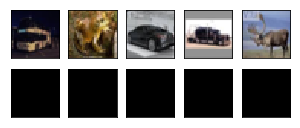

Epoch:  1 | train loss: 0.0425


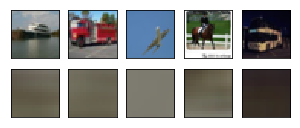

Epoch:  2 | train loss: 0.0434


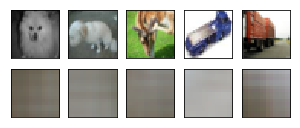

Epoch:  3 | train loss: 0.0402


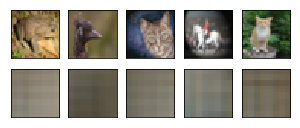

Epoch:  4 | train loss: 0.0407


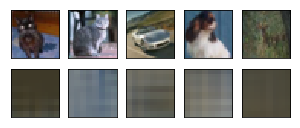

Epoch:  5 | train loss: 0.0443


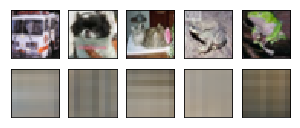

Epoch:  6 | train loss: 0.0406


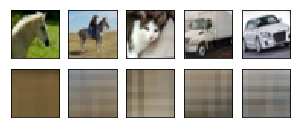

Epoch:  7 | train loss: 0.0383


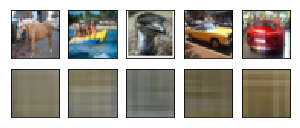

Epoch:  8 | train loss: 0.0408


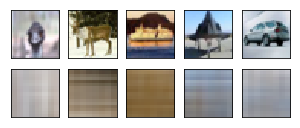

Epoch:  9 | train loss: 0.0417


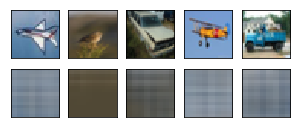

Epoch:  10 | train loss: 0.0419


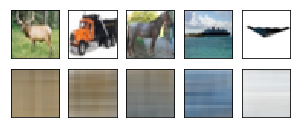

Epoch:  11 | train loss: 0.0428


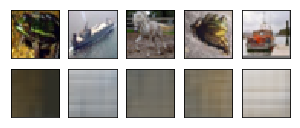

Epoch:  12 | train loss: 0.0450


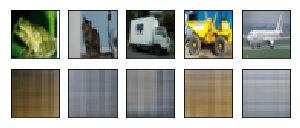

Epoch:  13 | train loss: 0.0450


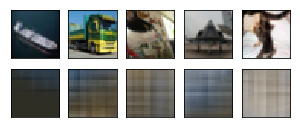

Epoch:  14 | train loss: 0.0372


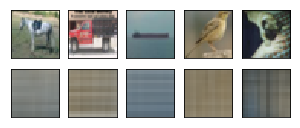

Epoch:  15 | train loss: 0.0394


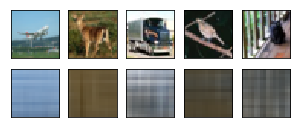

Epoch:  16 | train loss: 0.0426


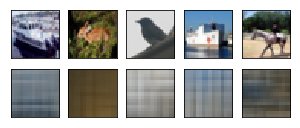

Epoch:  17 | train loss: 0.0374


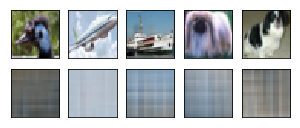

Epoch:  18 | train loss: 0.0392


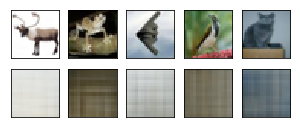

Epoch:  19 | train loss: 0.0400


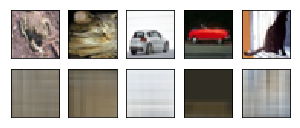

Epoch:  20 | train loss: 0.0430


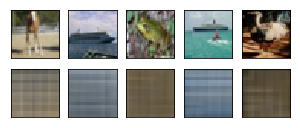

Epoch:  21 | train loss: 0.0373


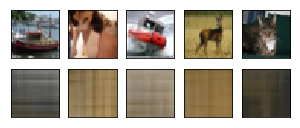

Epoch:  22 | train loss: 0.0380


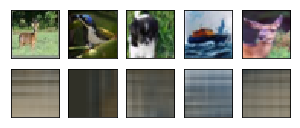

Epoch:  23 | train loss: 0.0417


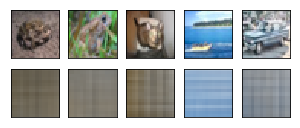

Epoch:  24 | train loss: 0.0391


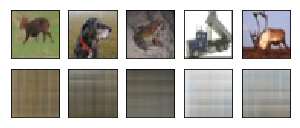

Epoch:  25 | train loss: 0.0356


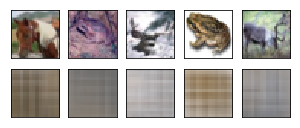

Epoch:  26 | train loss: 0.0386


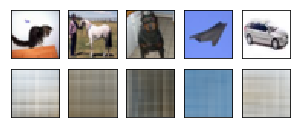

Epoch:  27 | train loss: 0.0417


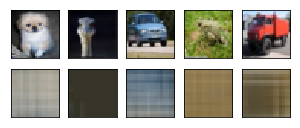

Epoch:  28 | train loss: 0.0400


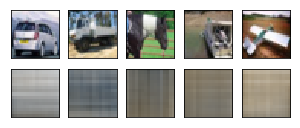

Epoch:  29 | train loss: 0.0435


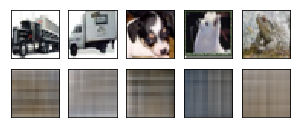

Epoch:  30 | train loss: 0.0405


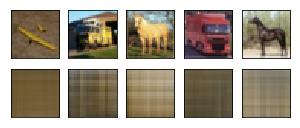

Epoch:  31 | train loss: 0.0372


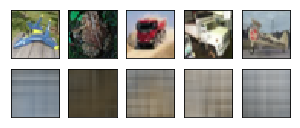

Epoch:  32 | train loss: 0.0419


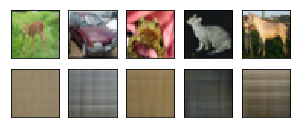

Epoch:  33 | train loss: 0.0409


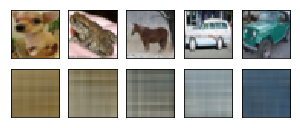

Epoch:  34 | train loss: 0.0415


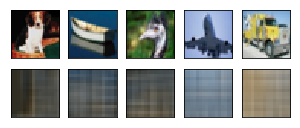

Epoch:  35 | train loss: 0.0419


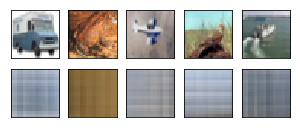

Epoch:  36 | train loss: 0.0379


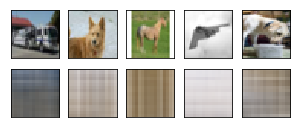

Epoch:  37 | train loss: 0.0424


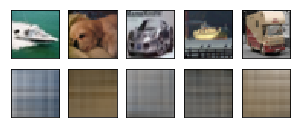

Epoch:  38 | train loss: 0.0381


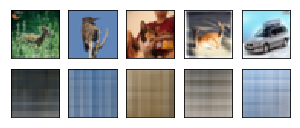

Epoch:  39 | train loss: 0.0425


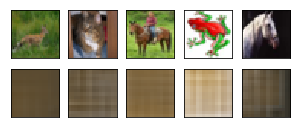

Epoch:  40 | train loss: 0.0407


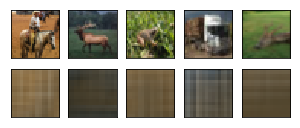

Epoch:  41 | train loss: 0.0388


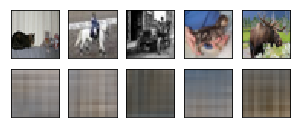

Epoch:  42 | train loss: 0.0394


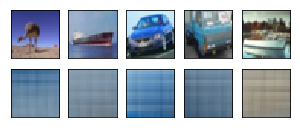

Epoch:  43 | train loss: 0.0383


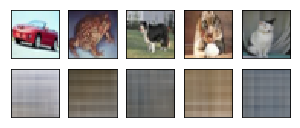

Epoch:  44 | train loss: 0.0422


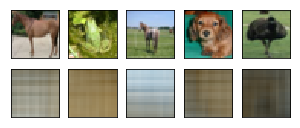

Epoch:  45 | train loss: 0.0380


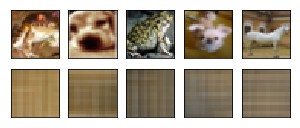

Epoch:  46 | train loss: 0.0431


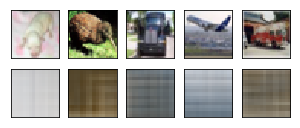

Epoch:  47 | train loss: 0.0414


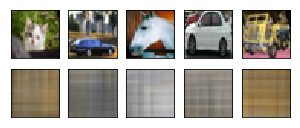

Epoch:  48 | train loss: 0.0414


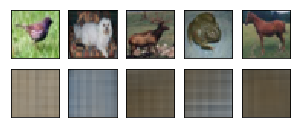

Epoch:  49 | train loss: 0.0392


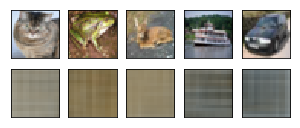

Epoch:  50 | train loss: 0.0392


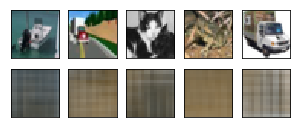

Epoch:  51 | train loss: 0.0372


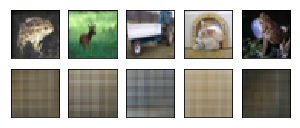

Epoch:  52 | train loss: 0.0401


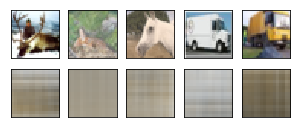

Epoch:  53 | train loss: 0.0410


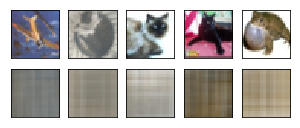

Epoch:  54 | train loss: 0.0398


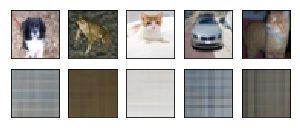

Epoch:  55 | train loss: 0.0386


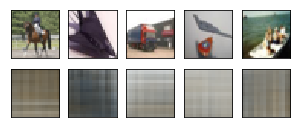

Epoch:  56 | train loss: 0.0412


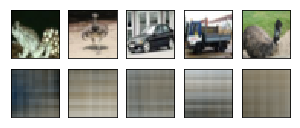

Epoch:  57 | train loss: 0.0393


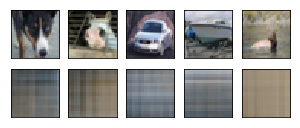

Epoch:  58 | train loss: 0.0426


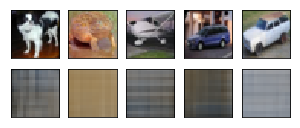

Epoch:  59 | train loss: 0.0406


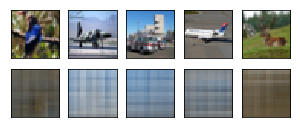

Epoch:  60 | train loss: 0.0407


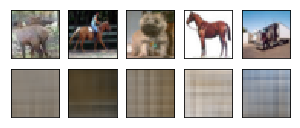

Epoch:  61 | train loss: 0.0399


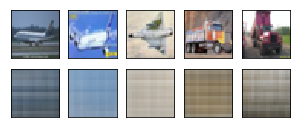

Epoch:  62 | train loss: 0.0399


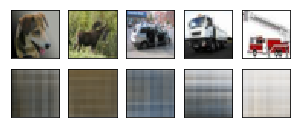

Epoch:  63 | train loss: 0.0401


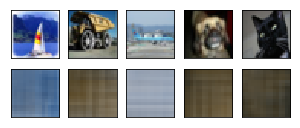

Epoch:  64 | train loss: 0.0391


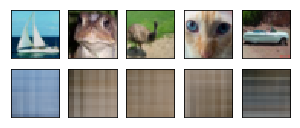

Epoch:  65 | train loss: 0.0399


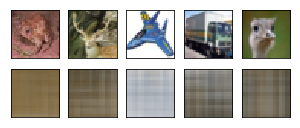

Epoch:  66 | train loss: 0.0413


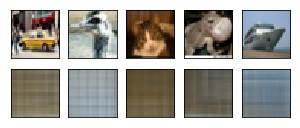

Epoch:  67 | train loss: 0.0441


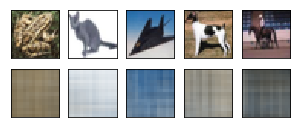

Epoch:  68 | train loss: 0.0386


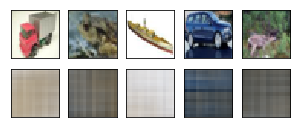

KeyboardInterrupt: 

In [117]:
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)
autoencoder = ConvolutionalAutoEncoder(input_size)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR*10)
loss_func = nn.MSELoss()
EPOCH = 100
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x)   
        b_y = Variable(x)   
        decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               
        loss.backward()                     
        optimizer.step()                    
        if step % 500 == 0 and epoch in range(EPOCH):
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])

            # plotting decoded image (second row)
            decoded_data = torch.clamp(decoded, 0, 1)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.swapaxes(np.swapaxes(b_x.data.numpy()[i], 0 ,2), 0, 1)); 
                a[0][i].set_xticks(()); 
                a[0][i].set_yticks(())
            
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.swapaxes(np.swapaxes(decoded_data.data.numpy()[i], 0 ,2),0,1))
                #a[1][i].imshow(np.swapaxes(np.swapaxes(np.reshape(decoded_data.data.numpy()[i], (3, input_size, input_size)),0,2),0,1))
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show()      

In [126]:
class ConvolutionalAutoEncoder(nn.Module):
    def __init__(self, input_size):
        super(ConvolutionalAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=1, padding= 0),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(16, 8, 3, stride=1, padding= 0),
            nn.MaxPool2d(2, stride=1),
            nn.ReLU(True),
            nn.Conv2d(8, 8, 4, stride=2, padding= 0),
            nn.MaxPool2d(2, stride=1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 2, stride=2, padding=0),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 3, 4, stride=2, padding=0),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model = ConvolutionalAutoEncoder(input_size)

print(model)       

ConvolutionalAutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace)
    (6): Conv2d(8, 8, kernel_size=(4, 4), stride=(2, 2))
    (7): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace)
    (2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace)
    (4): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2))
    (5): Sigmoid()
  )
)


/Users/haosheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch:  0 | train loss: 0.0627


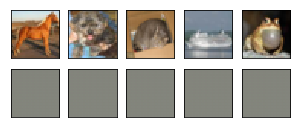

Epoch:  1 | train loss: 0.0418


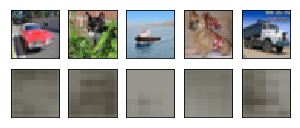

Epoch:  2 | train loss: 0.0392


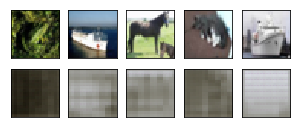

Epoch:  3 | train loss: 0.0371


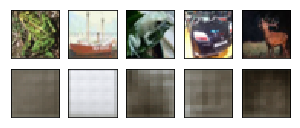

Epoch:  4 | train loss: 0.0334


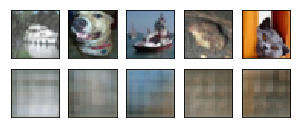

Epoch:  5 | train loss: 0.0316


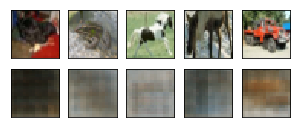

Epoch:  6 | train loss: 0.0299


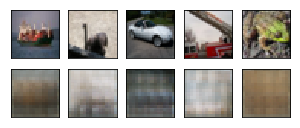

Epoch:  7 | train loss: 0.0300


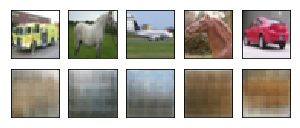

Epoch:  8 | train loss: 0.0280


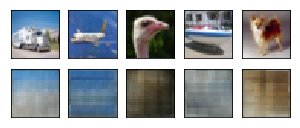

Epoch:  9 | train loss: 0.0305


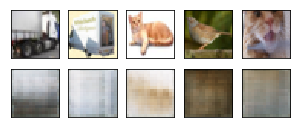

Epoch:  10 | train loss: 0.0311


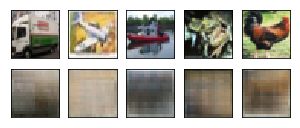

Epoch:  11 | train loss: 0.0306


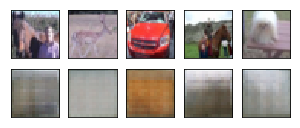

Epoch:  12 | train loss: 0.0294


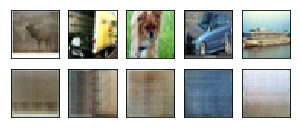

Epoch:  13 | train loss: 0.0270


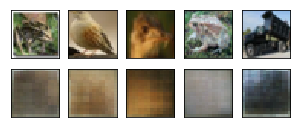

Epoch:  14 | train loss: 0.0290


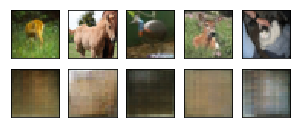

Epoch:  15 | train loss: 0.0303


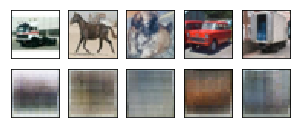

Epoch:  16 | train loss: 0.0301


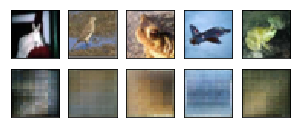

Epoch:  17 | train loss: 0.0289


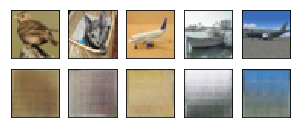

Epoch:  18 | train loss: 0.0268


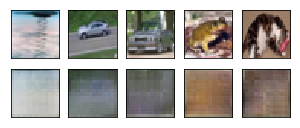

Epoch:  19 | train loss: 0.0267


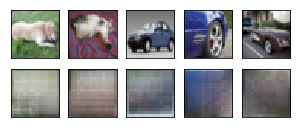

Epoch:  20 | train loss: 0.0264


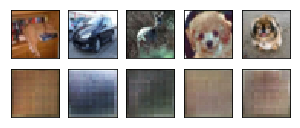

Epoch:  21 | train loss: 0.0305


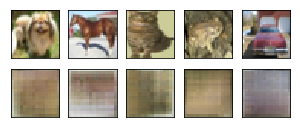

Epoch:  22 | train loss: 0.0256


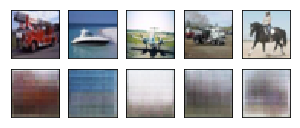

Epoch:  23 | train loss: 0.0271


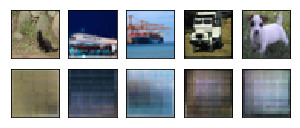

Epoch:  24 | train loss: 0.0284


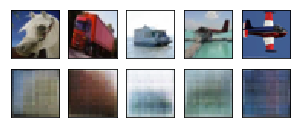

Epoch:  25 | train loss: 0.0278


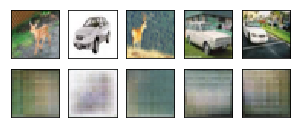

Epoch:  26 | train loss: 0.0284


KeyboardInterrupt: 

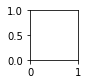

In [127]:
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)
autoencoder = ConvolutionalAutoEncoder(input_size)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()
EPOCH = 100
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x)   
        b_y = Variable(x)   
        decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               
        loss.backward()                     
        optimizer.step()                    
        if step % 500 == 0 and epoch in range(EPOCH):
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])

            # plotting decoded image (second row)
            decoded_data = torch.clamp(decoded, 0, 1)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.swapaxes(np.swapaxes(b_x.data.numpy()[i], 0 ,2), 0, 1)); 
                a[0][i].set_xticks(()); 
                a[0][i].set_yticks(())
            
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.swapaxes(np.swapaxes(decoded_data.data.numpy()[i], 0 ,2),0,1))
                #a[1][i].imshow(np.swapaxes(np.swapaxes(np.reshape(decoded_data.data.numpy()[i], (3, input_size, input_size)),0,2),0,1))
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show()      